In [1]:
!pip install hazm

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np

In [ ]:
path_to_data = "../Data/comments.csv"

df = pd.read_csv(path_to_data)
df.head()

,commentId,date,createdDate,sender,customerId,commentText,deliveryComment,rating,feeling,status,...,replies,code,restaurantID,title,highlight,restaurantRate,description,commentCount,address,vendorType
0,65301421,۱۴۰۳/۱۰/۱۷,2025-01-06 15:11:22,مینا,3311560.0,عالی,NaN,10.0,HAPPY,1.0,...,NaN,094k7y,26598,رستوران کلبه کباب,رستوران کلبه کباب,8.584729,"ایرانی ,کباب ,چلو کباب ,کاسه کباب",6329,خیابان پاسداران، خیابان دولت، بعد از دیباجی، پ...,RESTAURANT
1,65259495,۱۴۰۳/۱۰/۱۷,2025-01-06 12:39:54,غزال,20757745.0,عالی,NaN,10.0,HAPPY,1.0,...,NaN,094k7y,26598,رستوران کلبه کباب,رستوران کلبه کباب,8.584729,"ایرانی ,کباب ,چلو کباب ,کاسه کباب",6329,خیابان پاسداران، خیابان دولت، بعد از دیباجی، پ...,RESTAURANT
2,64992598,۱۴۰۳/۱۰/۱۳,2025-01-02 15:33:14,فرناز,4903715.0,چند سال مشتری شما هستیم همیشه عالی بود ممنون ک...,NaN,10.0,HAPPY,1.0,...,NaN,094k7y,26598,رستوران کلبه کباب,رستوران کلبه کباب,8.584729,"ایرانی ,کباب ,چلو کباب ,کاسه کباب",6329,خیابان پاسداران، خیابان دولت، بعد از دیباجی، پ...,RESTAURANT
3,64938950,۱۴۰۳/۱۰/۱۲,2025-01-01 21:06:41,آيه,5968977.0,واقعا بی نظیر و خوشمزه بود. همه چی عالی. با ای...,NaN,10.0,HAPPY,1.0,...,NaN,094k7y,26598,رستوران کلبه کباب,رستوران کلبه کباب,8.584729,"ایرانی ,کباب ,چلو کباب ,کاسه کباب",6329,خیابان پاسداران، خیابان دولت، بعد از دیباجی، پ...,RESTAURANT
4,64965243,۱۴۰۳/۱۰/۱۲,2025-01-01 20:17:56,حسین,4182489.0,درجه یک\nجلو مهمان ها ابروی ما رو خرید,NaN,10.0,HAPPY,1.0,...,NaN,094k7y,26598,رستوران کلبه کباب,رستوران کلبه کباب,8.584729,"ایرانی ,کباب ,چلو کباب ,کاسه کباب",6329,خیابان پاسداران، خیابان دولت، بعد از دیباجی، پ...,RESTAURANT


In [38]:
df.shape

(933970, 22)

In [39]:
df.columns

Index(['commentId', 'date', 'createdDate', 'sender', 'customerId',
       'commentText', 'deliveryComment', 'rating', 'feeling', 'status',
       'expeditionType', 'foods', 'replies', 'code', 'restaurantID', 'title',
       'highlight', 'restaurantRate', 'description', 'commentCount', 'address',
       'vendorType'],
      dtype='object')

In [40]:
df.customerId.nunique()

299640

In [41]:
df.code.nunique()

2064

In [42]:
df.columns

Index(['commentId', 'date', 'createdDate', 'sender', 'customerId',
       'commentText', 'deliveryComment', 'rating', 'feeling', 'status',
       'expeditionType', 'foods', 'replies', 'code', 'restaurantID', 'title',
       'highlight', 'restaurantRate', 'description', 'commentCount', 'address',
       'vendorType'],
      dtype='object')

In [43]:
df.isnull().sum()

commentId               0
date                    0
createdDate             0
sender                353
customerId              0
commentText         38360
deliveryComment    877913
rating                  0
feeling               787
status                  0
expeditionType        306
foods                 768
replies            637376
code                    0
restaurantID            0
title                   0
highlight               0
restaurantRate          0
description        283705
commentCount            0
address                 0
vendorType              0
dtype: int64

## رسیدگی به ستون‌های غیر متنی

<Axes: >

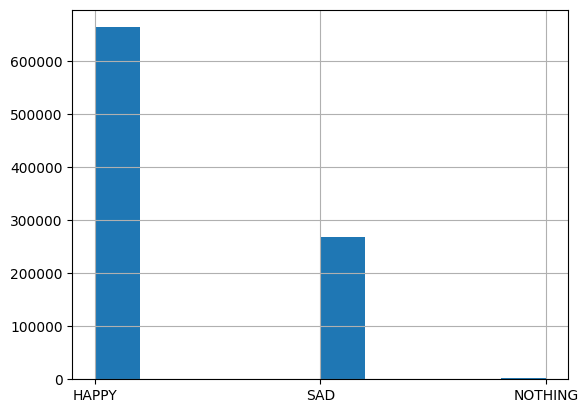

In [44]:
df.feeling.hist()

In [ ]:
df.feeling.fillna("NOTHING", inplace=True)

/tmp/ipykernel_58566/3905095298.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.feeling.fillna('NOTHING', inplace=True)


<Axes: >

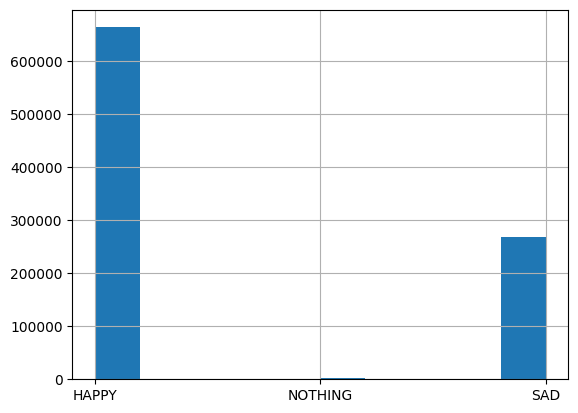

In [46]:
df.feeling.hist()

In [5]:
df.feeling.isnull().sum()

0

In [6]:
df.status.value_counts()

status
1.0    933970
Name: count, dtype: int64

In [ ]:
df.drop(columns=["status"], inplace=True)

In [8]:
df.expeditionType.unique()

array(['DELIVERY', 'ZF_EXPRESS', 'PICKUP', nan, 'MIARE'], dtype=object)

In [9]:
df.expeditionType.value_counts()

expeditionType
ZF_EXPRESS    471994
DELIVERY      451280
PICKUP         10388
MIARE              2
Name: count, dtype: int64

In [ ]:
df.expeditionType.fillna("NO_DIFFER", inplace=True)

/tmp/ipykernel_58566/4055717994.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.expeditionType.fillna('NO_DIFFER', inplace=True)


In [11]:
df.expeditionType.value_counts()

expeditionType
ZF_EXPRESS    471994
DELIVERY      451280
PICKUP         10388
NO_DIFFER        306
MIARE              2
Name: count, dtype: int64

In [12]:
df.columns

Index(['commentId', 'date', 'createdDate', 'sender', 'customerId',
       'commentText', 'deliveryComment', 'rating', 'feeling', 'expeditionType',
       'foods', 'replies', 'code', 'restaurantID', 'title', 'highlight',
       'restaurantRate', 'description', 'commentCount', 'address',
       'vendorType'],
      dtype='object')

In [ ]:
df.drop(columns=["date", "createdDate"], inplace=True)

## رسیدگی به ستون‌های متنی

In [14]:
df.isnull().sum()

commentId               0
sender                353
customerId              0
commentText         38360
deliveryComment    877913
rating                  0
feeling                 0
expeditionType          0
foods                 768
replies            637376
code                    0
restaurantID            0
title                   0
highlight               0
restaurantRate          0
description        283705
commentCount            0
address                 0
vendorType              0
dtype: int64

In [15]:
df.deliveryComment[~df.deliveryComment.isnull()].head().tolist()

['اینکه ۷۰ دقیقه برتی ارسالش زمان خواستن بد بود ولی اونقدر کبابها خوشمزه بودن که ارزشش رو داشت فقط وقتی آدم ۶۰۰ تومن غذا سفارش میده توقع نداره که تو ظرف پلاستیکی ریخته شده باشه کلا غیر یهداشتیه و ظرف گیاهی الان خیلی وقته که مرسوم هست برای غذای داغ',
 'خيلي دير ارسال شد و سرد اما با كيفيت و خوشمزه بود .',
 'خیلی دیر رسید- غذا بسیار سرد شده بود مجبور شدم مجدد گرم کنم',
 'عدم اطلاع رسیدن غذا',
 'ایشون اصلا صلاحیت نداره درب منزل بیاد برای تحویل غذا حیف کلبه کباب که همچین افرادی با بد اخلاقی و اخلاق بد خرابش میکنند.']

In [58]:
df.commentText[~df.commentText.isnull()].head().tolist()

['عالی',
 'عالی',
 'چند سال مشتری شما هستیم همیشه عالی بود ممنون که کیفیت رو حفظ کردید',
 'واقعا بی نظیر و خوشمزه بود. همه چی عالی. با اینکه مسیر دور بود ولی غذا داغ رسید به دستمون.',
 'درجه یک\nجلو مهمان ها ابروی ما رو خرید']

In [ ]:
df[["description", "highlight", "title"]].head()

,description,highlight,title
0,"ایرانی ,کباب ,چلو کباب ,کاسه کباب",رستوران کلبه کباب,رستوران کلبه کباب
1,"ایرانی ,کباب ,چلو کباب ,کاسه کباب",رستوران کلبه کباب,رستوران کلبه کباب
2,"ایرانی ,کباب ,چلو کباب ,کاسه کباب",رستوران کلبه کباب,رستوران کلبه کباب
3,"ایرانی ,کباب ,چلو کباب ,کاسه کباب",رستوران کلبه کباب,رستوران کلبه کباب
4,"ایرانی ,کباب ,چلو کباب ,کاسه کباب",رستوران کلبه کباب,رستوران کلبه کباب


In [60]:
df.foods[~df.foods.isnull()].head().tolist()

['چلو جوجه کباب فیله حلزونی',
 'چلو کره| کاسه کباب مخصوص کلبه| نوشابه قوطی| زیتون پرورده| خوراک کباب برگ',
 'دوغ محلی بطری| خوراک جوجه کباب ترش',
 'ماست و بادمجان| کاسه کباب مخصوص کلبه| چلو کره| چلو کره (نیم پرس)',
 'خوراک کباب کوبیده یک سیخ (150 گرمی)| گوجه کبابی| نوشابه خانواده| خوراک جوجه کباب ران (350 گرمی)| گوجه کبابی| ماست و خیار']

In [ ]:
df.drop(
    columns=[
        "deliveryComment",
        "replies",
        "highlight",
        "address",
        "description",
        "foods",
        "title",
    ],
    inplace=True,
)

In [20]:
df.columns

Index(['commentId', 'sender', 'customerId', 'commentText', 'rating', 'feeling',
       'expeditionType', 'code', 'restaurantID', 'restaurantRate',
       'commentCount', 'vendorType'],
      dtype='object')

In [21]:
df.isnull().sum()

commentId             0
sender              353
customerId            0
commentText       38360
rating                0
feeling               0
expeditionType        0
code                  0
restaurantID          0
restaurantRate        0
commentCount          0
vendorType            0
dtype: int64

In [ ]:
df.dropna(subset=["commentText"], inplace=True)
df.isnull().sum()

commentId           0
sender            353
customerId          0
commentText         0
rating              0
feeling             0
expeditionType      0
code                0
restaurantID        0
restaurantRate      0
commentCount        0
vendorType          0
dtype: int64

In [ ]:
df.sender.fillna("Khorzoo_Khan", inplace=True)

/tmp/ipykernel_58566/270438424.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.sender.fillna('Khorzo_Khan', inplace=True)


In [24]:
df.isnull().sum()

commentId         0
sender            0
customerId        0
commentText       0
rating            0
feeling           0
expeditionType    0
code              0
restaurantID      0
restaurantRate    0
commentCount      0
vendorType        0
dtype: int64

In [25]:
df.shape

(895610, 12)

In [ ]:
user_features = (
    df.groupby("customerId")
    .agg(

        user_avg_rating=("rating", "mean"),

        user_comment_count=("commentId", "count"),

    )
    .reset_index()
)



df = pd.merge(df, user_features, on="customerId")

del user_features

In [27]:
df.shape

(895610, 14)

In [ ]:
import re
from hazm import Normalizer, word_tokenize, stopwords_list

normalizer = Normalizer()
stopwords = stopwords_list()


def clean_text(text):
    text = re.sub(r"[^\w\s]", "", text)
    text = normalizer.normalize(text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords]
    return " ".join(tokens)


df["cleaned_comment"] = df["commentText"].apply(clean_text)

In [ ]:
df.drop(columns=["commentText"], inplace=True)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


resto_vectorizer = TfidfVectorizer(max_features=50)

resto_text_profiles = (
    df.groupby("code")["cleaned_comment"].apply(" ".join).reset_index()
)
resto_text_profiles.rename(columns={"cleaned_comment": "resto_profile"}, inplace=True)

resto_text_features = resto_vectorizer.fit_transform(
    resto_text_profiles["resto_profile"]
)

resto_features_df = pd.DataFrame(
    resto_text_features.toarray(),
    columns=["resto_" + col for col in resto_vectorizer.get_feature_names_out()],
)
resto_features_df["code"] = resto_text_profiles["code"]

In [31]:
resto_text_profiles.shape

(2059, 2)

In [32]:
resto_text_profiles.head()

,code,resto_profile
0,094k7y,سال مشتری ممنون کیفیت حفظ کردید واقعا خوشمزه...
1,094kok,کیفیت مشتری پیتزا هستم کیفیت نان سوسیس سس پخته...
2,094l9k,کیک خوردم چیزش اندازه ممنون تازه سلام تشکر م...
3,094rxy,خوشمزه کیفیت زمان تحویل سفارش کوتاه خوشمزه سر...
4,09527n,خوشمزه تازه باکیفیت مجددا سفارش میدم گزینه ...


In [33]:
resto_features_df.columns

Index(['resto_ارسال', 'resto_اصلا', 'resto_افتضاح', 'resto_ای', 'resto_باشه',
       'resto_بد', 'resto_برنج', 'resto_بسته', 'resto_تازه', 'resto_تحویل',
       'resto_توجه', 'resto_توضیحات', 'resto_جوجه', 'resto_حجم', 'resto_خشک',
       'resto_خوشمزه', 'resto_دادم', 'resto_رستوران', 'resto_زمینی',
       'resto_ساندویچ', 'resto_سرد', 'resto_سس', 'resto_سفارش', 'resto_سلام',
       'resto_سیب', 'resto_طعم', 'resto_غذا', 'resto_قیمت', 'resto_مرغ',
       'resto_مزه', 'resto_معمولی', 'resto_ممنون', 'resto_ممنونم',
       'resto_مونده', 'resto_میداد', 'resto_نان', 'resto_نداشت', 'resto_نون',
       'resto_ها', 'resto_های', 'resto_واقعا', 'resto_پایین', 'resto_پیتزا',
       'resto_پیک', 'resto_کباب', 'resto_کیفیت', 'resto_کیک', 'resto_گرم',
       'resto_گوشت', 'resto_یه', 'code'],
      dtype='object')

In [34]:
resto_features_df.head()

,resto_ارسال,resto_اصلا,resto_افتضاح,resto_ای,resto_باشه,resto_بد,resto_برنج,resto_بسته,resto_تازه,resto_تحویل,...,resto_پایین,resto_پیتزا,resto_پیک,resto_کباب,resto_کیفیت,resto_کیک,resto_گرم,resto_گوشت,resto_یه,code
0,0.108868,0.055786,0.016705,0.024009,0.037980,0.038918,0.109415,0.087498,0.054141,0.055362,...,0.030035,0.000000,0.060159,0.570507,0.247185,0.000000,0.064957,0.033016,0.051787,094k7y
1,0.060909,0.080611,0.043304,0.040340,0.042931,0.092650,0.000000,0.036084,0.027412,0.049188,...,0.066736,0.779079,0.074261,0.000000,0.240975,0.000000,0.082485,0.034510,0.094728,094kok
2,0.099381,0.252186,0.077080,0.082060,0.152829,0.082456,0.000000,0.183511,0.595256,0.061802,...,0.069292,0.000000,0.055075,0.000000,0.375820,0.100322,0.010126,0.000000,0.028905,094l9k
3,0.075896,0.146103,0.046251,0.030775,0.055022,0.159425,0.000000,0.132136,0.076120,0.043264,...,0.065337,0.000000,0.039657,0.000000,0.299042,0.000000,0.060757,0.294868,0.104065,094rxy
4,0.047343,0.182276,0.000000,0.000000,0.106780,0.096019,0.000000,0.144244,0.102270,0.053975,...,0.051872,0.000000,0.057721,0.000000,0.385311,0.000000,0.053060,0.064378,0.151467,09527n


In [ ]:
user_text_profiles = (
    df.groupby("customerId")["cleaned_comment"].apply(" ".join).reset_index()

)
user_text_profiles.rename(columns={"cleaned_comment": "user_profile"}, inplace=True)


user_vectorizer = TfidfVectorizer(max_features=50)

user_text_features = user_vectorizer.fit_transform(user_text_profiles["user_profile"])


user_features_df = pd.DataFrame(
    user_text_features.toarray(),
    columns=["user_" + col for col in user_vectorizer.get_feature_names_out()],
)

user_features_df["customerId"] = user_text_profiles["customerId"]

In [36]:
user_features_df.columns

Index(['user_ارسال', 'user_اصلا', 'user_افتضاح', 'user_ای', 'user_باشه',
       'user_بد', 'user_برنج', 'user_بسته', 'user_تازه', 'user_تحویل',
       'user_توجه', 'user_توضیحات', 'user_جوجه', 'user_حجم', 'user_خشک',
       'user_خوشمزه', 'user_دادم', 'user_رستوران', 'user_زمینی',
       'user_ساندویچ', 'user_سرد', 'user_سس', 'user_سفارش', 'user_سلام',
       'user_سیب', 'user_طعم', 'user_غذا', 'user_قیمت', 'user_مرغ', 'user_مزه',
       'user_معمولی', 'user_ممنون', 'user_ممنونم', 'user_مونده', 'user_میداد',
       'user_نان', 'user_نداشت', 'user_نون', 'user_ها', 'user_های',
       'user_واقعا', 'user_پایین', 'user_پیتزا', 'user_پیک', 'user_کباب',
       'user_کیفیت', 'user_کیک', 'user_گرم', 'user_گوشت', 'user_یه',
       'customerId'],
      dtype='object')

In [37]:
user_features_df.head()

,user_ارسال,user_اصلا,user_افتضاح,user_ای,user_باشه,user_بد,user_برنج,user_بسته,user_تازه,user_تحویل,...,user_پایین,user_پیتزا,user_پیک,user_کباب,user_کیفیت,user_کیک,user_گرم,user_گوشت,user_یه,customerId
0,0.0,0.246648,0.000000,0.0,0.32488,0.0,0.078157,0.263745,0.253088,0.0,...,0.15075,0.0,0.000000,0.000000,0.177337,0.083998,0.0,0.0,0.000000,124983.0
1,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.093179,0.000000,0.000000,0.0,...,0.00000,0.0,0.098774,0.000000,0.000000,0.000000,0.0,0.0,0.088999,124986.0
2,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.0,...,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,124990.0
3,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.0,...,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,125014.0
4,0.0,0.000000,0.430594,0.0,0.00000,0.0,0.438356,0.000000,0.000000,0.0,...,0.00000,0.0,0.000000,0.419046,0.248657,0.000000,0.0,0.0,0.000000,125024.0


In [ ]:
df = pd.merge(df, resto_features_df, on="code", how="left")
df = pd.merge(df, user_features_df, on="customerId", how="left")

In [ ]:
df.drop(columns=["cleaned_comment"], inplace=True)

In [40]:
del resto_features_df
del user_features_df
del resto_text_profiles
del user_text_features
del user_vectorizer
del resto_vectorizer

In [41]:
df.shape

(895610, 113)

In [42]:
df.columns

Index(['commentId', 'sender', 'customerId', 'rating', 'feeling',
       'expeditionType', 'code', 'restaurantID', 'restaurantRate',
       'commentCount',
       ...
       'user_واقعا', 'user_پایین', 'user_پیتزا', 'user_پیک', 'user_کباب',
       'user_کیفیت', 'user_کیک', 'user_گرم', 'user_گوشت', 'user_یه'],
      dtype='object', length=113)

<Axes: >

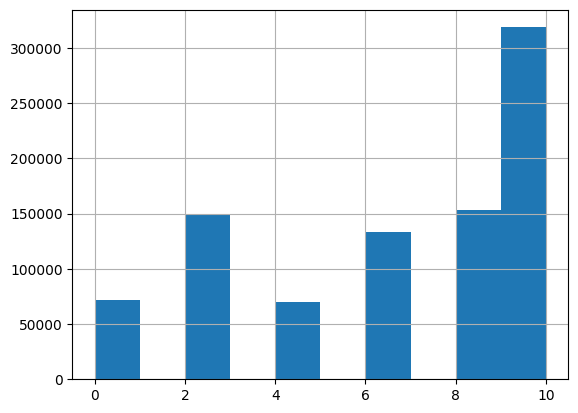

In [43]:
df.rating.hist()

<Axes: >

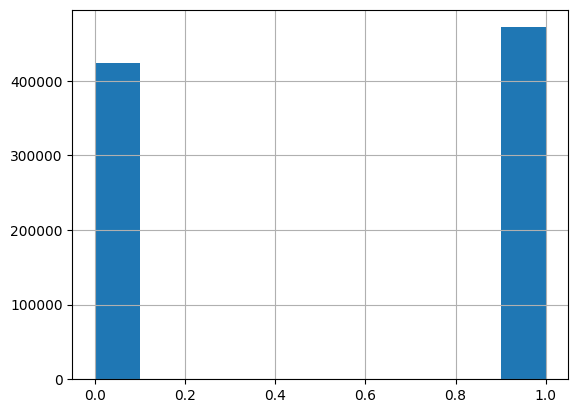

In [ ]:
df["will_like"] = (df["rating"] > 6).astype(int)
df.will_like.hist()

In [ ]:
df.drop(columns=["rating"], inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

le = LabelEncoder()
scaler = StandardScaler()

df["expeditionType"] = le.fit_transform(df["expeditionType"])
df["vendorType"] = le.fit_transform(df["vendorType"])
df["feeling"] = le.fit_transform(df["feeling"])

df[["user_avg_rating", "user_comment_count"]] = scaler.fit_transform(
    df[["user_avg_rating", "user_comment_count"]]
)

In [47]:
df.columns

Index(['commentId', 'sender', 'customerId', 'feeling', 'expeditionType',
       'code', 'restaurantID', 'restaurantRate', 'commentCount', 'vendorType',
       ...
       'user_پایین', 'user_پیتزا', 'user_پیک', 'user_کباب', 'user_کیفیت',
       'user_کیک', 'user_گرم', 'user_گوشت', 'user_یه', 'will_like'],
      dtype='object', length=113)

In [ ]:
columns_to_drop_for_training = [
    "commentId",
    "sender",
    "customerId",
    "code",
    "restaurantID",
    "will_like",
]

In [ ]:
from sklearn.model_selection import train_test_split

train, validation_test = train_test_split(df, test_size=0.3, random_state=42)
validation, test = train_test_split(validation_test, test_size=0.5, random_state=42)

In [51]:
train.columns

Index(['commentId', 'sender', 'customerId', 'feeling', 'expeditionType',
       'code', 'restaurantID', 'restaurantRate', 'commentCount', 'vendorType',
       ...
       'user_پایین', 'user_پیتزا', 'user_پیک', 'user_کباب', 'user_کیفیت',
       'user_کیک', 'user_گرم', 'user_گوشت', 'user_یه', 'will_like'],
      dtype='object', length=113)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=42)
lr_model.fit(train.drop(columns=columns_to_drop_for_training), train["will_like"])

/home/tahaes/miniconda3/envs/py310/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_val_lr_pred = lr_model.predict(validation.drop(columns=columns_to_drop_for_training))

print("Accuracy:", accuracy_score(validation["will_like"], y_val_lr_pred))
print("Precision:", precision_score(validation["will_like"], y_val_lr_pred))
print("Recall:", recall_score(validation["will_like"], y_val_lr_pred))
print("F1 Score:", f1_score(validation["will_like"], y_val_lr_pred, average="macro"))

Accuracy: 0.8374584080809284
Precision: 0.8051897850266846
Recall: 0.9122284067470969
F1 Score: 0.8553734882303851


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


def print_metrics(y_true, y_pred):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred, average="macro"))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model1 = RandomForestClassifier(n_estimators=250, max_depth=15, random_state=42)
rf_model1.fit(train.drop(columns=columns_to_drop_for_training), train["will_like"])

RandomForestClassifier(max_depth=15, n_estimators=250, random_state=42)

In [ ]:
y_rf1_val_pred = rf_model1.predict(
    validation.drop(columns=columns_to_drop_for_training)
)



print_metrics(validation["will_like"], y_rf1_val_pred)

Accuracy: 0.8743496028762626
Precision: 0.855243040911008
Recall: 0.9166925663266747
F1 Score: 0.8732844235396493


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(max_depth=10, random_state=42)
dt_model.fit(train.drop(columns=columns_to_drop_for_training), train["will_like"])

,criterion,'gini'
,splitter,'best'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [ ]:
y_dt_val_pred = dt_model.predict(validation.drop(columns=columns_to_drop_for_training))

print_metrics(validation["will_like"], y_dt_val_pred)

Accuracy: 0.8725333293633366
Precision: 0.8443491876074848
Recall: 0.9294210719633826
F1 Score: 0.8710594474330193


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(
    n_estimators=100, learning_rate=0.1, max_depth=15, random_state=42
)
gb_model.fit(train.drop(columns=columns_to_drop_for_training), train["will_like"])

In [ ]:
rf_model = RandomForestClassifier(n_estimators=500, max_depth=15, random_state=42)
rf_model.fit(train.drop(columns=columns_to_drop_for_training), train["will_like"])

RandomForestClassifier(max_depth=15, n_estimators=500, random_state=42)

In [ ]:
y_rf_val_pred = rf_model.predict(validation.drop(columns=columns_to_drop_for_training))

print_metrics(validation["will_like"], y_rf_val_pred)

Accuracy: 0.8740965155834779
Precision: 0.8544770226877928
Recall: 0.9172717769050377
F1 Score: 0.8730088177078836


In [ ]:
rf_small_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_small_model.fit(train.drop(columns=columns_to_drop_for_training), train["will_like"])

RandomForestClassifier(max_depth=5, random_state=42)

In [ ]:
y_rf_small_val_pred = rf_small_model.predict(
    validation.drop(columns=columns_to_drop_for_training)
)

In [ ]:
print_metrics(validation["will_like"], y_rf_small_val_pred)

Accuracy: 0.8493832858174347
Precision: 0.8260914439054599
Recall: 0.9045856525301613
F1 Score: 0.863558510566562


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(
    n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42
)
gb_model.fit(train.drop(columns=columns_to_drop_for_training), train["will_like"])

GradientBoostingClassifier(random_state=42)

In [ ]:
y_gb_val_pred = gb_model.predict(validation.drop(columns=columns_to_drop_for_training))

In [ ]:
print_metrics(validation["will_like"], y_gb_val_pred)

Accuracy: 0.8716475238385899
Precision: 0.8471723315134931
Recall: 0.9228943576413415
F1 Score: 0.883413680957951


## از مدل درخت تصمیم ساده استفاده می‌کنیم تا در مصرف حافظه صرفه‌جویی شود.

In [ ]:
y_test_pred = dt_model.predict(test.drop(columns=columns_to_drop_for_training))
print_metrics(test["will_like"], y_test_pred)

Accuracy: 0.8740974527697964
Precision: 0.8464238419110557
Recall: 0.9298193579368106
F1 Score: 0.8726667874297129


In [60]:
del train
del validation
del test

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895610 entries, 0 to 895609
Columns: 113 entries, commentId to will_like
dtypes: float64(104), int64(7), object(2)
memory usage: 772.1+ MB


## Recommendation

In [ ]:
all_restaurant_codes = df["code"].unique()

rated_restaurants = df[df["customerId"] == 1322757]["code"].unique()

candidate_codes = list(set(all_restaurant_codes) - set(rated_restaurants))

In [63]:
len(candidate_codes)

1767

کد 1322757 متعلق به امین دانش است که بیشترین تعداد امتیاز را در دیتافریم ما دارد. همچنین امتیازات ایشون از هیستوگرام خوبی برخوردار هست.

In [ ]:
user_features = [
    col for col in df.columns if "user_" in col or col in ["customerId", "feeling"]
]

restaurant_features = [
    col
    for col in df.columns
    if "resto_" in col
    or col in ["vendorType", "expeditionType", "commentCount", "code"]
]


print("User Features:", user_features)

print("Restaurant Features:", restaurant_features)

User Features: ['customerId', 'feeling', 'user_avg_rating', 'user_comment_count', 'user_ارسال', 'user_اصلا', 'user_افتضاح', 'user_ای', 'user_باشه', 'user_بد', 'user_برنج', 'user_بسته', 'user_تازه', 'user_تحویل', 'user_توجه', 'user_توضیحات', 'user_جوجه', 'user_حجم', 'user_خشک', 'user_خوشمزه', 'user_دادم', 'user_رستوران', 'user_زمینی', 'user_ساندویچ', 'user_سرد', 'user_سس', 'user_سفارش', 'user_سلام', 'user_سیب', 'user_طعم', 'user_غذا', 'user_قیمت', 'user_مرغ', 'user_مزه', 'user_معمولی', 'user_ممنون', 'user_ممنونم', 'user_مونده', 'user_میداد', 'user_نان', 'user_نداشت', 'user_نون', 'user_ها', 'user_های', 'user_واقعا', 'user_پایین', 'user_پیتزا', 'user_پیک', 'user_کباب', 'user_کیفیت', 'user_کیک', 'user_گرم', 'user_گوشت', 'user_یه']
Restaurant Features: ['expeditionType', 'code', 'commentCount', 'vendorType', 'resto_ارسال', 'resto_اصلا', 'resto_افتضاح', 'resto_ای', 'resto_باشه', 'resto_بد', 'resto_برنج', 'resto_بسته', 'resto_تازه', 'resto_تحویل', 'resto_توجه', 'resto_توضیحات', 'resto_جوجه', 

In [ ]:
all_restaurant_codes = df["code"].drop_duplicates()

user_id = 1322757
rated_restaurants = df.loc[df["customerId"] == user_id, "code"].unique()

candidate_codes = all_restaurant_codes[~all_restaurant_codes.isin(rated_restaurants)]

recommendation_df = pd.DataFrame({"code": candidate_codes})
recommendation_df["customerId"] = user_id

user_features_cols = [
    col for col in df.columns if "user_" in col or col in ["customerId", "feeling"]
]
user_row = df.loc[df["customerId"] == user_id, user_features_cols].drop_duplicates(
    "customerId"
)


user_row = user_row.iloc[[0]]

recommendation_df = recommendation_df.merge(user_row, on="customerId", how="left")

restaurant_features_cols = [
    col
    for col in df.columns
    if "resto_" in col
    or col in ["vendorType", "expeditionType", "commentCount", "code", "restaurantRate"]
]
resto_features = df[restaurant_features_cols].drop_duplicates(subset=["code"])

recommendation_df = recommendation_df.merge(resto_features, on="code", how="left")

In [75]:
recommendation_df.shape

(1767, 109)

In [ ]:
cols_to_drop_for_prediction = ["code", "customerId", "code"]

In [ ]:
recommendation_df["recommendation_score"] = dt_model.predict_proba(
    recommendation_df.drop(columns=cols_to_drop_for_prediction)[
        [col for col in df.columns.tolist() if col not in columns_to_drop_for_training]
    ]
)[:, 1]

In [81]:
recommendation_df.recommendation_score.head()

0    0.698540
1    0.624600
2    0.624600
3    0.490068
4    0.624600
Name: recommendation_score, dtype: float64

In [ ]:
recommendation_df.sort_values(by="recommendation_score", ascending=False, inplace=True)

In [ ]:
submission = recommendation_df[["code", "recommendation_score"]].head(250)

In [99]:
submission.head()

,code,recommendation_score
167,0leeqe,0.734835
474,0yxrey,0.734835
462,0yo7vg,0.734835
208,0md6jq,0.734835
465,0yonrg,0.734835
